In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [11]:
df = pd.read_csv("./datasets/banking.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [12]:
# Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [15]:
# Remove Outliers, For Each float type value, find the first and third quantile, and remove the values that are outside of 1.5 times of the interquantile range
for col in df.select_dtypes(include=['float64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = round(q3 - q1, 3)
    print(f"{col} => , q1 : {q1}, q3 : {q3}, iqr : {iqr}")
    # print the number of outliers removed
    before = df.shape[0]
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
    print(f"Outliers removed : {before - df.shape[0]}")

emp_var_rate => , q1 : -1.8, q3 : 1.4, iqr : 3.2
Outliers removed : 0
cons_price_idx => , q1 : 93.075, q3 : 93.994, iqr : 0.919
Outliers removed : 0
cons_conf_idx => , q1 : -42.7, q3 : -36.4, iqr : 6.3
Outliers removed : 0
euribor3m => , q1 : 1.354, q3 : 4.961, iqr : 3.607
Outliers removed : 0
nr_employed => , q1 : 5099.1, q3 : 5228.1, iqr : 129.0
Outliers removed : 0


In [16]:
# Standardize the float data type cols and print which cols are standardized and their mean and std before and after standardization

for col in df.select_dtypes(include=['float64']).columns:
    print(f"{col} => mean : {df[col].mean()}, std : {df[col].std()}")
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    print(f"{col} => mean : {df[col].mean()}, std : {df[col].std()}")
    

emp_var_rate => mean : 0.12008787216808621, std : 1.5363962712601562
emp_var_rate => mean : -3.662501522044649e-18, std : 1.0000122728751055
cons_price_idx => mean : 93.58822333766967, std : 0.5693840103336479
cons_price_idx => mean : -5.595604706346691e-15, std : 1.0000122728751055
cons_conf_idx => mean : -40.65184457917086, std : 4.427505333996714
cons_conf_idx => mean : 6.156490653722671e-16, std : 1.0000122728751055
euribor3m => mean : 3.6529530202989617, std : 1.7172474427206765
euribor3m => mean : 1.2208338406815496e-18, std : 1.0000122728751055
nr_employed => mean : 5168.676581330847, std : 70.91913184961858
nr_employed => mean : -4.019159408358044e-15, std : 1.0000122728751055


/tmp/ipykernel_6107/3808163246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


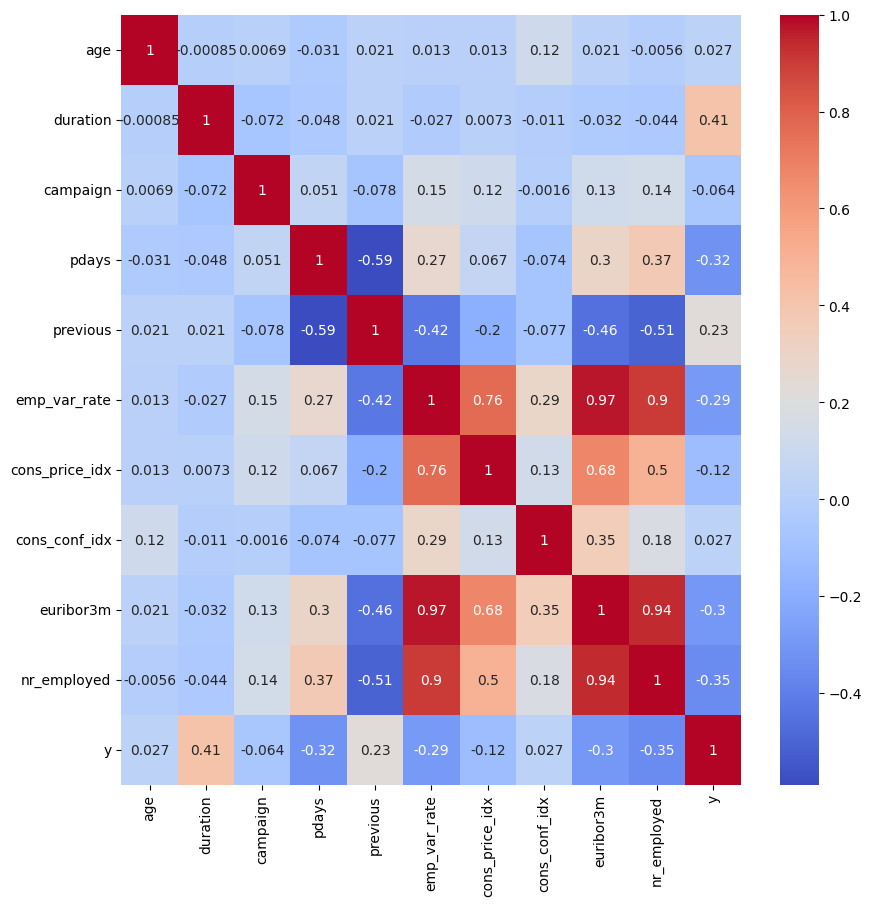

In [23]:
# Find the correlation between the features and the target variable and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
